#### 라이브러리 로드  

In [31]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


#### 데이터 로드  

In [32]:
url ='https://raw.githubusercontent.com/MyungKyuYi/AI-class/refs/heads/main/BP_data.csv'
df = pd.read_csv(url)
df

,Patient_Number,Blood_Pressure_Abnormality,Level_of_Hemoglobin,Genetic_Pedigree_Coefficient,Age,BMI,Sex,Pregnancy,Smoking,Physical_activity,salt_content_in_the_diet,alcohol_consumption_per_day,Level_of_Stress,Chronic_kidney_disease,Adrenal_and_thyroid_disorders
0,1,1,11.28,0.90,34,23,1,1.0,0,45961,48071,NaN,2,1,1
1,2,0,9.75,0.23,54,33,1,NaN,0,26106,25333,205.0,3,0,0
2,3,1,10.79,0.91,70,49,0,NaN,0,9995,29465,67.0,2,1,0
3,4,0,11.00,0.43,71,50,0,NaN,0,10635,7439,242.0,1,1,0
4,5,1,14.17,0.83,52,19,0,NaN,0,15619,49644,397.0,2,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,1996,1,10.14,0.02,69,26,1,NaN,1,26118,47568,144.0,3,1,0
1996,1997,1,11.77,1.00,24,45,1,1.0,1,2572,8063,NaN,3,1,1
1997,1998,1,16.91,0.22,18,42,0,NaN,0,14933,24753,NaN,2,1,1
1998,1999,0,11.15,0.72,46,45,1,NaN,1,18157,15275,253.0,3,0,1


#### Data preprocessing  

In [33]:
df.info() # 결측치 확인

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 15 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Patient_Number                 2000 non-null   int64  
 1   Blood_Pressure_Abnormality     2000 non-null   int64  
 2   Level_of_Hemoglobin            2000 non-null   float64
 3   Genetic_Pedigree_Coefficient   1908 non-null   float64
 4   Age                            2000 non-null   int64  
 5   BMI                            2000 non-null   int64  
 6   Sex                            2000 non-null   int64  
 7   Pregnancy                      442 non-null    float64
 8   Smoking                        2000 non-null   int64  
 9   Physical_activity              2000 non-null   int64  
 10  salt_content_in_the_diet       2000 non-null   int64  
 11  alcohol_consumption_per_day    1758 non-null   float64
 12  Level_of_Stress                2000 non-null   i

#### correlation_matrix  

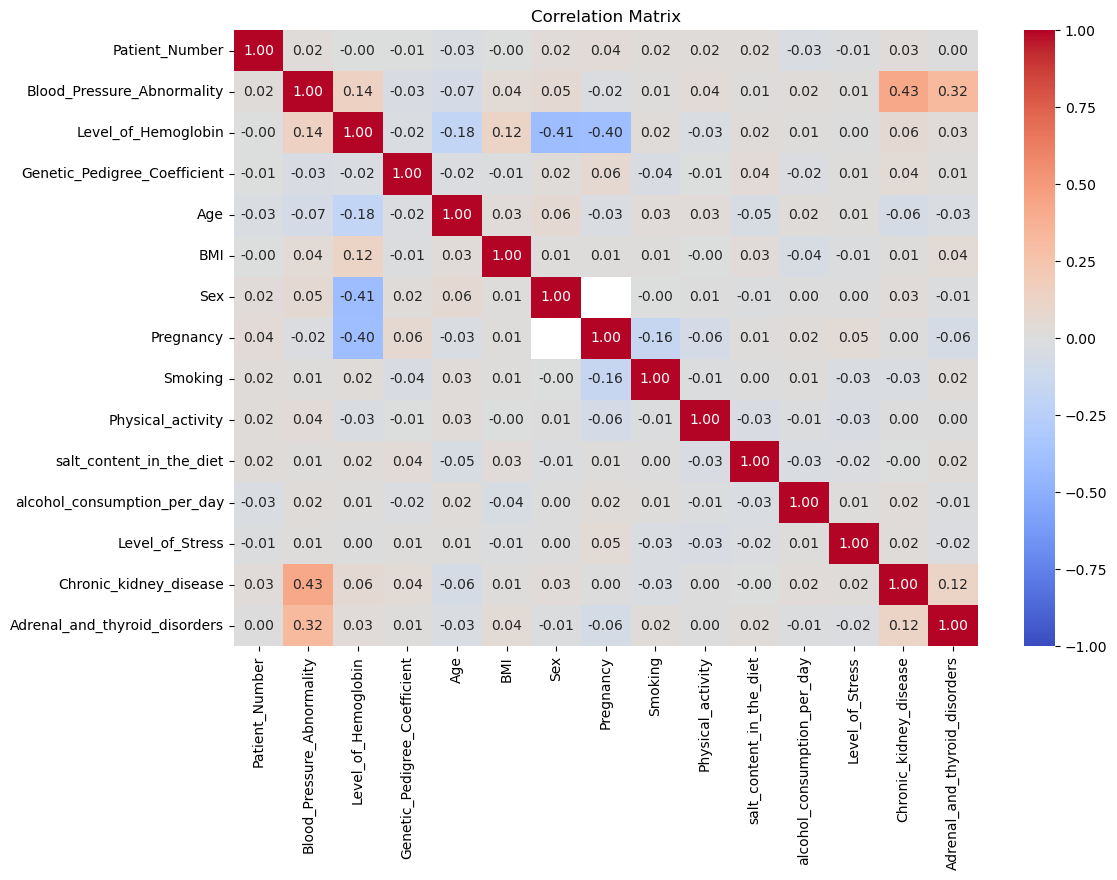

In [35]:
correlation_matrix = df.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix')
plt.show()

In [36]:
df.isnull().sum() # 결측치 확인
df = df.drop(columns=['Patient_Number','Pregnancy'])

In [37]:
# 결측치 처리
df["Genetic_Pedigree_Coefficient"] = df["Genetic_Pedigree_Coefficient"].fillna(df["Genetic_Pedigree_Coefficient"].mean()) # 결측치 평균으로 대체
df["alcohol_consumption_per_day"] = df["alcohol_consumption_per_day"].fillna(df["alcohol_consumption_per_day"].mean()) # 결측치 평균으로 대체

In [38]:
df.dropna(inplace=True) # 결측치가 있는 행 삭제

In [39]:
df.info() # 결측치 확인

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 13 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Blood_Pressure_Abnormality     2000 non-null   int64  
 1   Level_of_Hemoglobin            2000 non-null   float64
 2   Genetic_Pedigree_Coefficient   2000 non-null   float64
 3   Age                            2000 non-null   int64  
 4   BMI                            2000 non-null   int64  
 5   Sex                            2000 non-null   int64  
 6   Smoking                        2000 non-null   int64  
 7   Physical_activity              2000 non-null   int64  
 8   salt_content_in_the_diet       2000 non-null   int64  
 9   alcohol_consumption_per_day    2000 non-null   float64
 10  Level_of_Stress                2000 non-null   int64  
 11  Chronic_kidney_disease         2000 non-null   int64  
 12  Adrenal_and_thyroid_disorders  2000 non-null   i

In [40]:
from sklearn.preprocessing import StandardScaler
# 데이터 분리
X= df.drop(columns=['Blood_Pressure_Abnormality'],axis=1)
y= df['Blood_Pressure_Abnormality']
X_scaler = StandardScaler()
X_scaled = X_scaler.fit_transform(df)
X_scaled
y

0       1
1       0
2       1
3       0
4       1
       ..
1995    1
1996    1
1997    1
1998    0
1999    1
Name: Blood_Pressure_Abnormality, Length: 2000, dtype: int64

In [41]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

In [42]:
X_train.shape

(1400, 13)

In [43]:
y_train.shape

(1400,)

#### Model Structure  

In [44]:
import torch
import torch.nn as nn
import torch.optim as optim

# PyTorch 모델 정의
class MultiLabelClassificationModel(nn.Module):
    def __init__(self, input_dim, output_dim):
        super(MultiLabelClassificationModel, self).__init__()
        self.fc1 = nn.Linear(input_dim, 13)  # 입력층
        self.relu1 = nn.ReLU()
        self.fc2 = nn.Linear(13, 32)  # 은닉층 1
        self.relu2 = nn.ReLU()
        self.fc3 = nn.Linear(32, 32)  # 은닉층 2
        self.relu3 = nn.ReLU()
        self.fc4 = nn.Linear(32, output_dim)  # 출력층
        self.sigmoid = nn.Sigmoid()  # 다중 라벨 분류를 위한 활성화 함수

    def forward(self, x):
        x = self.fc1(x)
        x = self.relu1(x)
        x = self.fc2(x)
        x = self.relu2(x)
        x = self.fc3(x)
        x = self.relu3(x)
        x = self.fc4(x)
        x = self.sigmoid(x)
        return x

# 입력 및 출력 차원 설정
input_dim = 13
output_dim = 1 

# 모델 초기화
model = MultiLabelClassificationModel(input_dim, output_dim)

# 손실 함수 및 옵티마이저 설정
criterion = nn.BCELoss()  # Binary Cross-Entropy Loss
optimizer = optim.Adam(model.parameters(), lr=0.001)

# 모델 요약 출력
print(model)

MultiLabelClassificationModel(
  (fc1): Linear(in_features=13, out_features=13, bias=True)
  (relu1): ReLU()
  (fc2): Linear(in_features=13, out_features=32, bias=True)
  (relu2): ReLU()
  (fc3): Linear(in_features=32, out_features=32, bias=True)
  (relu3): ReLU()
  (fc4): Linear(in_features=32, out_features=1, bias=True)
  (sigmoid): Sigmoid()
)


In [45]:
print(y_train)

836     1
575     1
557     1
1235    0
1360    1
       ..
1130    1
1294    1
860     1
1459    0
1126    1
Name: Blood_Pressure_Abnormality, Length: 1400, dtype: int64


In [46]:
type(y_train)

pandas.core.series.Series

In [47]:
type(X_train)

numpy.ndarray

In [48]:
type(y_train.values)

numpy.ndarray

In [49]:
from torch.utils.data import TensorDataset, DataLoader

# TensorDataset 생성
train_dataset = TensorDataset(
    torch.tensor(X_train, dtype=torch.float32),
    torch.tensor(y_train.values, dtype=torch.float32)
)
test_dataset = TensorDataset(
    torch.tensor(X_test, dtype=torch.float32),
    torch.tensor(y_test.values, dtype=torch.float32)
)

In [50]:
batch_size = 100  # 배치 크기 설정
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)


#### 학습  

In [51]:
import torch

# 변수 초기화
train_losses = []
test_accuracies = []

# GPU 사용 여부 확인
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)  # 모델을 GPU로 이동

# Training loop
num_epochs = 20
for epoch in range(num_epochs):
    model.train()
    running_loss = 0.0

    for inputs, labels in train_loader:
        inputs, labels = inputs.to(device).float(), labels.to(device).float()  # 데이터를 GPU로 이동 및 dtype 변환
        labels = labels.view(-1, 1)  # BCEWithLogitsLoss를 사용할 경우 labels 크기 맞추기

        # Zero the parameter gradients
        optimizer.zero_grad()

        # Forward pass
        outputs = model(inputs)
        loss = criterion(outputs, labels)

        # Backward pass and optimize
        loss.backward()
        optimizer.step()

        running_loss += loss.item()

    # Calculate average loss over an epoch
    train_losses.append(running_loss / len(train_loader))

    # Evaluate on test data
    model.eval()
    correct = 0
    total = 0
    with torch.no_grad():
        for inputs, labels in test_loader:
            inputs, labels = inputs.to(device).float(), labels.to(device).float()
            labels = labels.view(-1, 1)

            outputs = model(inputs)
            predicted = (outputs >= 0.5).float()  # 이진 분류에서는 0.5 기준으로 예측값 결정
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

    accuracy = 100 * correct / total
    test_accuracies.append(accuracy)

    print(f"Epoch {epoch + 1}/{num_epochs}, Loss: {train_losses[-1]:.4f}, Accuracy: {accuracy:.2f}%")

print("Training complete.")

Epoch 1/20, Loss: 0.6919, Accuracy: 45.33%
Epoch 2/20, Loss: 0.6778, Accuracy: 56.33%
Epoch 3/20, Loss: 0.6522, Accuracy: 78.33%
Epoch 4/20, Loss: 0.5986, Accuracy: 83.50%
Epoch 5/20, Loss: 0.5085, Accuracy: 87.50%
Epoch 6/20, Loss: 0.3909, Accuracy: 91.83%
Epoch 7/20, Loss: 0.2650, Accuracy: 96.00%
Epoch 8/20, Loss: 0.1544, Accuracy: 97.67%
Epoch 9/20, Loss: 0.0791, Accuracy: 99.17%
Epoch 10/20, Loss: 0.0376, Accuracy: 99.67%
Epoch 11/20, Loss: 0.0196, Accuracy: 100.00%
Epoch 12/20, Loss: 0.0115, Accuracy: 100.00%
Epoch 13/20, Loss: 0.0077, Accuracy: 100.00%
Epoch 14/20, Loss: 0.0056, Accuracy: 100.00%
Epoch 15/20, Loss: 0.0043, Accuracy: 100.00%
Epoch 16/20, Loss: 0.0034, Accuracy: 100.00%
Epoch 17/20, Loss: 0.0028, Accuracy: 100.00%
Epoch 18/20, Loss: 0.0023, Accuracy: 100.00%
Epoch 19/20, Loss: 0.0020, Accuracy: 100.00%
Epoch 20/20, Loss: 0.0017, Accuracy: 100.00%
Training complete.


#### Test 및 평가  

In [77]:
import torch
import numpy as np
from sklearn.metrics import confusion_matrix, f1_score, precision_score, recall_score

# 모델 평가 모드로 변경
model.eval()

# GPU 사용 여부 확인
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)  # 모델을 GPU로 이동

# 결과 저장
all_labels = []
all_predictions = []

# 평가 데이터 처리
with torch.no_grad():
    for inputs, labels in test_loader:
        inputs, labels = inputs.to(device).float(), labels.to(device).float()  # 데이터 GPU로 이동 및 dtype 변환

        outputs = model(inputs)

        # 이진 분류일 경우 확률 기준으로 예측
        predicted = (outputs >= 0.5).float()  # 0.5 기준으로 분류

        all_labels.extend(labels.cpu().numpy())  # flatten()을 사용하여 1D 배열로 변환
        all_predictions.extend(predicted.cpu().numpy().flatten())  # flatten()을 사용하여 1D 배열로 변환


# Calculate metrics
conf_matrix = confusion_matrix(all_labels, all_predictions)
f1 = f1_score(all_labels, all_predictions, average='weighted', zero_division=0)
precision = precision_score(all_labels, all_predictions, average='weighted', zero_division=0)
recall = recall_score(all_labels, all_predictions, average='weighted', zero_division=0)

# 결과 출력
print(f'Confusion Matrix:\n{conf_matrix}')
print(f'F1 Score: {f1:.2f}')
print(f'Precision: {precision:.2f}')
print(f'Recall: {recall:.2f}')

Confusion Matrix:
[[328   0]
 [  0 272]]
F1 Score: 1.00
Precision: 1.00
Recall: 1.00


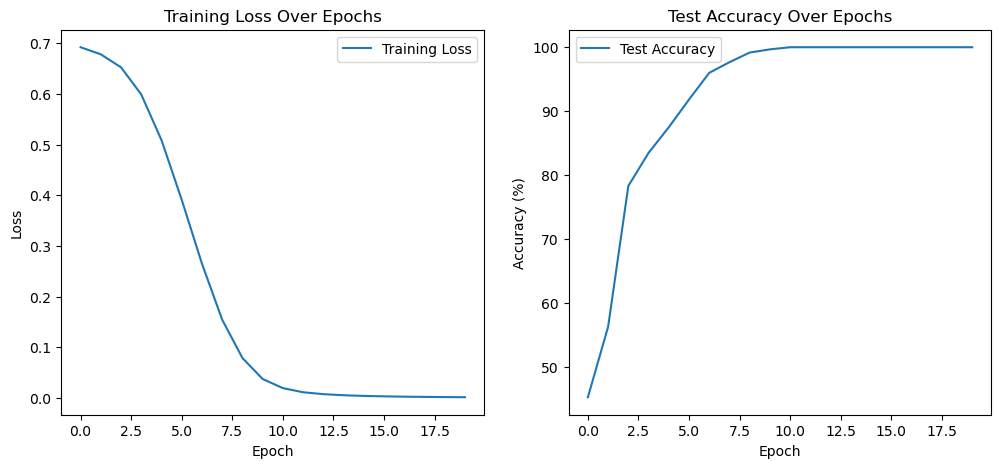

In [78]:
# Plot the loss and accuracy
plt.figure(figsize=(12, 5))

# Plot loss
plt.subplot(1, 2, 1)
plt.plot(train_losses, label='Training Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training Loss Over Epochs')
plt.legend()

# Plot accuracy
plt.subplot(1, 2, 2)
plt.plot(test_accuracies, label='Test Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy (%)')
plt.title('Test Accuracy Over Epochs')
plt.legend()

plt.show()